# Biplot visualization for SRRR

## `biomarkers_unweightedresults_rank_35`

Yosuke Tanigawa

In [1]:
import numpy as np
import pandas as pd
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce


In [2]:
from srrr_plot_functinos import *

## Step 0. Specify the input file

In [3]:
in_f_prefix = '/oak/stanford/groups/mrivas/projects/biobank-methods-dev/srrr-biplot/biomarkers_unweightedresults_rank_35'


In [4]:
d_df = pd.read_csv(in_f_prefix + '.D.tsv', sep='\t')
u_df = pd.read_csv(in_f_prefix + '.U.tsv', sep='\t')
v_df = pd.read_csv(in_f_prefix + '.V.tsv', sep='\t')

r = u_df.shape[1] -1
u = np.array(u_df[['V{}'.format(x+1) for x in range(r)]])
v = np.array(v_df[['V{}'.format(x+1) for x in range(r)]])
d = np.diag(d_df['eigen_v'])
ud = u.dot(d)
vd = v.dot(d)
phe_labels = u_df['#names']
var_labels = v_df['#names']


## Step 1. Specify components

In [5]:
PC_x = 0
PC_y = 1

## Step 2. Check phenotype PCA plot

GridSpec(1, 1)

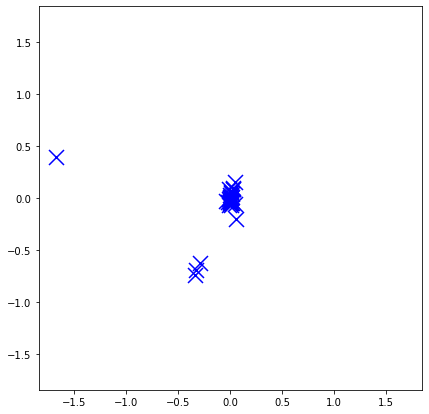

In [6]:
plot_pca(
    collections.OrderedDict({
        'x': ud[:,PC_x],
        'y': ud[:,PC_y]
    })    
)


## Step 3. Check variant PCA plot

GridSpec(1, 1)

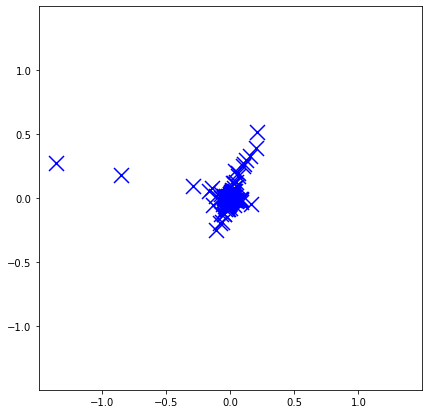

In [7]:
plot_pca(
    collections.OrderedDict({
        'x': vd[:,PC_x],
        'y': vd[:,PC_y]
    })    
)

## Step 4. Check biplot

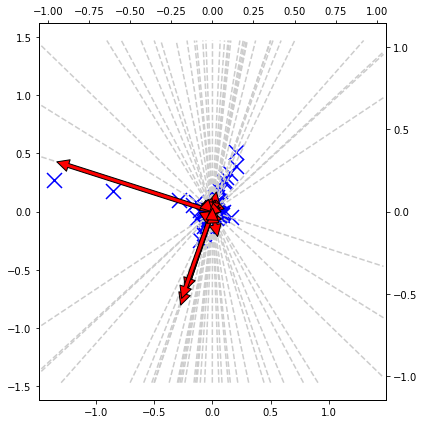

In [8]:
plot_biplot(
    collections.OrderedDict({
        'x': vd[:,PC_x],
        'y': vd[:,PC_y],
        'sub_x': u[:,PC_x],
        'sub_y': u[:,PC_y],
        'sub_y_div_x': u[:,PC_y] / u[:,PC_x],
        'sub_idxs': np.arange(len(u[:,PC_x]))
    })
)

## Step 5: Biplot with a subset of phenotypes

Let's say we are interested in plotting the top 5 phenotypes based on the length of the arrow.


In [9]:
phe_idxs = np.argsort(-(u[:,PC_x] ** 2 + u[:,PC_y] ** 2))[:5]

In [10]:
phe_labels[phe_idxs]

18                  Lipoprotein_A
4     Apolipoprotein_B_adjstatins
17          LDL_direct_adjstatins
7          Cholesterol_adjstatins
24                  Triglycerides
Name: #names, dtype: object

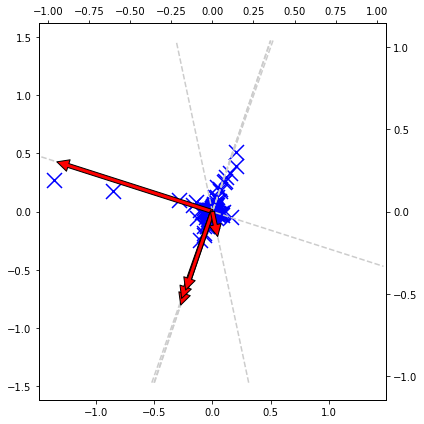

In [11]:
plot_biplot(
    collections.OrderedDict({
        'x': vd[:,PC_x],
        'y': vd[:,PC_y],
        'sub_x': u[:,PC_x],
        'sub_y': u[:,PC_y],
        'sub_y_div_x': u[:,PC_y] / u[:,PC_x],
        'sub_idxs': phe_idxs
    })
)
